In [1]:
###Python Packages###

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.colors import LogNorm
import math as mth

import timeit
import ODE_utils as odeu
from scipy import optimize
import tables
from scipy.integrate import cumtrapz as trapint
#from mpmath import *
!jt -t grade3 -cellw 100%

In [2]:
###Initial Values###

M0=1.0
Q=0.90
Lambda=0.0000#0.001#0.0001#0.1#0.14#0.1#0.1
scalarfield=True
A=.2#.025#.115
vscalarfield=False


In [3]:
Tol=.1#.025#.05
N=100#50
Nul=20#*N#500#*4#*8#*8
Nup=10**(60)
scal=50
uscal=1000
umax=60
vmax=20
extraterms=True
rcosmtol=.00000001#.0000000000000001
dpower=1.00#1.00

datatype=np.float64


#ru0=5.0
#dr0v=.4
ru0=5.0
#dr0v=0.045
dr0v=.1#0.5*(1-2*M0/ru0+Q**2.0/ru0**2.0-Lambda/3*ru0**2.0)#0.05#-1/(4*-.375)*(1-2*M0/ru0+Q**2/ru0**2-Lambda*ru0**2/3)

#dr0v=.075

vbdytype="edd"
ubdytype="stan"
scaltostan=False
solveaffine=False

Elist=[1]
#Elist=[1,2,4,8,16]
if vbdytype=="stan":
    dr0v=0.5

if vbdytype=="edd":
    dr0v=0.5*(1-2*M0/ru0+Q**2.0/ru0**2.0-Lambda/3*ru0**2.0)
    #dpower=0.5*np.exp(-vmax/50)+1.0#1.5*(vmax/100)^(-1)
    if Lambda>0.0:
        dpower=.5*np.exp(-vmax/100)+1.0#1.5*(vmax/100)^(-1)
        #dpower=1.0
#uloc=[1/8,1/4,3/8,1/2,5/8]
#uloc=[1/5,2/5,3/5,4/5,9/10]
uloc=[8.2/10]
print(dr0v)
print(dpower)

0.3162
1.0


In [4]:
###Defining Needed Constants###

scalf=float(scal)
u0=0.0
v0=0.0
rv0=ru0
phiu0=0.0
phiv0=0.0

if M0==0.0:
    dv0=1/N    
else:
    dv0=M0/N
    


def fr(r,M0,Q,Lambda):
    return 1-2*M0/r+Q**2.0/r**2.0-Lambda*r**2.0/3.0

if Lambda>0 or Lambda<0:
    sol = optimize.root(fr,[0.687,1.3,500.0],args=(M0,Q,Lambda), method='hybr')
    rminus=sol.x[0]
    rplus=sol.x[1]
    rcosm=sol.x[2]
else:
    rplus=M0+(M0**2-Q**2)**(.5)
    rminus=M0-(M0**2-Q**2)**(.5)
    rcosm=0.0
    

wHD=True 

print("r+: "+str(rplus))
print("r-: "+str(rminus))
print("rc: "+str(rcosm))

print("Max r along u=0: "+str(ru0+vmax*dr0v))
###Predicting Run time###

###timer
start = timeit.default_timer()

Nu=Nul*umax#int(umax/du0)
Nv=int(vmax/dv0)


r+: 1.4358898943540672
r-: 0.5641101056459328
rc: 0.0
Max r along u=0: 11.324


In [5]:
print((rplus-rminus)/(2*rminus)*rcosm/rminus)

0.0


In [6]:
##################################
###Applying Boundary Conditions###

Emax=max([Elist])


rnpf=np.zeros((2,Nv),dtype=datatype)
signpf=np.zeros((2,Nv),dtype=datatype)
phinpf=np.zeros((2,Nv),dtype=datatype)
drnpvf=np.zeros((2,Nv),dtype=datatype)
dsignpvf=np.zeros((2,Nv),dtype=datatype)
dphinpvf=np.zeros((2,Nv),dtype=datatype)
drnpuf=np.zeros((2,Nv),dtype=datatype)
dsignpuf=np.zeros((2,Nv),dtype=datatype)
dphinpuf=np.zeros((2,Nv),dtype=datatype)
massnpf=np.full((2,Nv),M0)#np.zeros((2,Nv))
#drunpv=np.full((1,Nv-1),-1/(4*dr0v)*(1-2*M0/ru0+Q**2/ru0**2))
 


rnpf[0], signpf[0], phinpf[0] , drnpvf[0], dsignpvf[0], dphinpvf[0], drnpuf[0], dsignpuf[0], dphinpuf[0] , massnpf[0]= odeu.boundaryv(scal,ubdytype,vbdytype,Nv,ru0,dr0v,dv0,vmax,M0,Q,Lambda,scalarfield,A,rcosmtol,datatype)


mask=~np.isnan(rnpf[0])
print(Nv)
rnpf=rnpf[:,mask]

Nv=int(len(rnpf[0]))
rnpf=rnpf.reshape(2,Nv)
signpf=signpf[:,mask]#.reshape(2,Nv)
phinpf=phinpf[:,mask]#.reshape(2,Nv)
dphinpuf=dphinpuf[:,mask]#.reshape(2,Nv)  
dphinpvf=dphinpvf[:,mask]#.reshape(2,Nv)
dsignpuf=dsignpuf[:,mask]#.reshape(2,Nv)
dsignpvf=dsignpvf[:,mask]#.reshape(2,Nv)
drnpuf=drnpuf[:,mask]#.reshape(2,Nv)
drnpvf=drnpvf[:,mask]#.reshape(2,Nv)
massnpf=massnpf[:,mask]#.reshape(2,Nv)
print(Nv)
#print(massnpf)

dr/dv is 0.3162
2000
2000


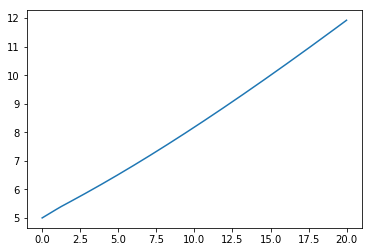

1.2816746602037898 inf
-0.3162
0.3162


In [7]:
vmax=(Nv)*dv0

vrange=np.arange(0,vmax-.00000001*vmax,dv0)#*rnpf[0])/rnpf[0]

    
plt.plot(vrange,rnpf[0])
#plt.plot(dphinpvf[0])
#plt.plot(dphinpuf[0])
Mc=np.nanmax(massnpf[0])
rcosm=odeu.rc(Mc,Q,Lambda)
plt.plot([0,vmax],[rcosm,rcosm],linestyle='--',color='green')
plt.show()



#print(vrange)
print(Mc,rcosm)
print(drnpuf[0,0])

print(drnpvf[0,0])

In [8]:
drunptemp=np.empty((Nv))*np.nan

###Applying Propagation Algorithm###

urange=np.array([0.0],dtype=datatype)



i=0
icount=0
dv=dv0
if M0>0:
    du0=M0/Nul
    #du0=M0/N
elif M0==0:
    du0=1/Nul
    #du0=1/N
du=du0

    
atom = tables.Float64Atom()

rnpfile = tables.open_file('rnpe.h5', mode='w',encoding="utf8") 
rnp = rnpfile.create_earray(rnpfile.root, 'data', atom, (0, Nv))
signpfile = tables.open_file('signpe.h5', mode='w',encoding="utf8") 
signp = signpfile.create_earray(signpfile.root, 'data', atom, (0, Nv))
phinpfile = tables.open_file('phinpe.h5', mode='w',encoding="utf8") 
phinp = phinpfile.create_earray(phinpfile.root, 'data', atom, (0, Nv))
massnpfile = tables.open_file('massnpe.h5', mode='w',encoding="utf8") 
massnp = massnpfile.create_earray(massnpfile.root, 'data', atom, (0, Nv))

if extraterms==True:
    drnpufile = tables.open_file('drnpue.h5', mode='w',encoding="utf8") 
    drnpu = drnpufile.create_earray(drnpufile.root, 'data', atom, (0, Nv))
    drnpvfile = tables.open_file('drnpve.h5', mode='w',encoding="utf8") 
    drnpv = drnpvfile.create_earray(drnpvfile.root, 'data', atom, (0, Nv))
    dsignpufile = tables.open_file('dsignpue.h5', mode='w',encoding="utf8") 
    dsignpu = dsignpufile.create_earray(dsignpufile.root, 'data', atom, (0, Nv))
    dsignpvfile = tables.open_file('dsignpve.h5', mode='w',encoding="utf8") 
    dsignpv = dsignpvfile.create_earray(dsignpvfile.root, 'data', atom, (0, Nv))
    dphinpufile = tables.open_file('dphinpue.h5', mode='w',encoding="utf8") 
    dphinpu = dphinpufile.create_earray(dphinpufile.root, 'data', atom, (0, Nv))
    dphinpvfile = tables.open_file('dphinpve.h5', mode='w',encoding="utf8") 
    dphinpv = dphinpvfile.create_earray(dphinpvfile.root, 'data', atom, (0, Nv))
    
rnp.append(rnpf[0].reshape(1,Nv))
signp.append(signpf[0].reshape(1,Nv))
phinp.append(phinpf[0].reshape(1,Nv))
massnp.append(massnpf[0].reshape(1,Nv))

if extraterms==True:
    drnpu.append(drnpuf[0].reshape(1,Nv))
    drnpv.append(drnpvf[0].reshape(1,Nv))
    dsignpu.append(dsignpuf[0].reshape(1,Nv))
    dsignpv.append(dsignpvf[0].reshape(1,Nv))
    dphinpu.append(dphinpuf[0].reshape(1,Nv))
    dphinpv.append(dphinpvf[0].reshape(1,Nv))
    
drunptemp=np.nanmax(np.abs(drnpuf[0]))     
dsigunpvalue=np.nanmax(np.abs(dsignpuf[0]))
dphiutemp=np.nanmax(np.abs(dphinpuf[0]))
druunptemp=np.nanmax(np.abs(odeu.Coneq(drnpuf[0],dsignpuf[0],dphinpuf[0],rnpf[0])))

i=0
TempTol=1 
TempTolv=1
Eres=False
if ubdytype=='adapt':
    maxsig1=signpf[0][0]-np.nanmax(signpf[0])
    maxsig2=signpf[0][0]-np.nanmax(signpf[0])
    maxsig3=signpf[0][0]-np.nanmax(signpf[0])
    print(maxsig1,maxsig2,maxsig3)
    

while max(urange)<umax and i<2000000 and ~np.isnan(drnpvf[1][0]): #and rnpf[1][0]>0.0 :

    
    du = du0*Tol*TempTol/(np.nanmax([abs(dsigunpvalue),abs(drunptemp),abs(dphiutemp),abs(druunptemp)]))**(dpower)
    du = np.min([du,1/(1*Nul)])
    
    ###############
    ###Predictor###
    ###############
    drnpvf[1] = drnpvf[0]+du*odeu.Rfunc(drnpvf[0],drnpuf[0],rnpf[0],signpf[0],Q,Lambda)
    dsignpvf[1] = dsignpvf[0]+du*odeu.Sigfunc(drnpvf[0],drnpuf[0],dphinpuf[0],dphinpvf[0],rnpf[0],signpf[0],Q)
    dphinpvf[1] = dphinpvf[0]+du*odeu.Phifunc(drnpvf[0],drnpuf[0],dphinpuf[0],dphinpvf[0],rnpf[0])
    drnpuf[1] = drnpuf[0]+du*odeu.Coneq(drnpuf[0],dsignpuf[0],dphinpuf[0],rnpf[0])
    
    rnpf[1] = rnpf[0]+1/2*du*(drnpuf[0]+drnpuf[1])
    #drnpuf[1][0] = drnpuf[0][0]+du*odeu.Coneq(drnpuf[0][0],dsignpuf[0][0],dphinpuf[0][0],rnpf[0][0])
    #rnpf[1][0] = rnpf[0][0]+0.5*du*(drnpuf[0][0]+drnpuf[1][0])
    #rnpf[1] = rnpf[1][0]+dv*trapint(drnpvf[1],initial=0)
    
    if ubdytype=='adapt':
        #nextsig=(maxsig1*3.0-maxsig2*3.0+maxsig3*1.0)
        #dsignpuf[1][0]=-np.nanmax(np.abs(dsignpuf[0]))/Nul
        dsignpuf[1][0] = -(signpf[1][-1]-np.log(drnpvf[1][-1])+3/2*np.log(2))
    elif ubdytype=='edd':
        #dsignpuf[1][0]=(np.log(abs(1-2*M0/rnpf[1][0]+Q**2.0/rnpf[1][0]-Lambda*rnpf[1][0]**2.0/3))-signpf[0][0])/du
        dsignpuf[1][0] = 2*(3*Q**2-3*M0*rnpf[1][0]+rnpf[1][0]**4*Lambda)/(rnpf[1][0]*(-3*Q**2+rnpf[1][0]*(6*M0-3*rnpf[1][0]+rnpf[1][0]**3*Lambda)))*drnpuf[1][0]
    
    elif ubdytype=='stan':
        dsignpuf[1][0] = 0.0
    
    signpf[1] = signpf[0]+du*dsignpuf[0]
    phinpf[1] = phinpf[0]+du*dphinpuf[0]
    
    #drnpuf[1][0] = -1/(4*drnpvf[1][0])*np.exp(signpf[1][0])*(1-2*M0/rnpf[1][0]+Q**2/rnpf[1][0]**2-Lambda*rnpf[1][0]**2/3)
    #drnpuf[1][0] = drnpuf[0][0]+du*odeu.Coneq(drnpuf[0][0],dsignpuf[0][0],dphinpuf[0][0],rnpf[0][0])
    #drnpuf[1] = 1/rnpf[1]*(rnpf[1][0]*drnpuf[1][0]+dv*trapint(-np.exp(signpf[1])/(4)*(1-Q**2/rnpf[1]**2-Lambda*rnpf[1]**2),initial=0))
    #drnpvf[1][0] = -1/(4*drnpuf[1][0])*np.exp(signpf[1][0])*(1-2*M0/rnpf[1][0]+Q**2/rnpf[1][0]**2-Lambda*rnpf[1][0]**2/3)
    #drnpvf[1] = np.exp(signpf[1])*(drnpvf[1][0]*np.exp(-signpf[1][0])-dv*trapint(rnpf[1]*(dphinpvf[1])**2.0*np.exp(-signpf[1]),initial=0))
    
    dphinpuf[1] = 1/(rnpf[1])*(rnpf[1][0]*dphinpuf[1][0]-dv*trapint(drnpuf[1]*dphinpvf[1],initial=0))
    Sigfuncnp = odeu.Sigfunc(drnpvf[1],drnpuf[1],dphinpuf[1],dphinpvf[1],rnpf[1],signpf[1],Q)
    dsignpuf[1] = dsignpuf[1][0]+dv*trapint(Sigfuncnp,initial=0)

    ################
    ###Corrector###
    ################
    drnpvf[1] = drnpvf[0]+1/2*du*(odeu.Rfunc(drnpvf[0],drnpuf[0],rnpf[0],signpf[0],Q,Lambda)+odeu.Rfunc(drnpvf[1],drnpuf[1],rnpf[1],signpf[1],Q,Lambda))
    dsignpvf[1] = dsignpvf[0]+1/2*du*(odeu.Sigfunc(drnpvf[0],drnpuf[0],dphinpuf[0],dphinpvf[0],rnpf[0],signpf[0],Q)+odeu.Sigfunc(drnpvf[1],drnpuf[1],dphinpuf[1],dphinpvf[1],rnpf[1],signpf[1],Q))
    dphinpvf[1] = dphinpvf[0]+1/2*du*(odeu.Phifunc(drnpvf[0],drnpuf[0],dphinpuf[0],dphinpvf[0],rnpf[0])+odeu.Phifunc(drnpvf[1],drnpuf[1],dphinpuf[1],dphinpvf[1],rnpf[1]))
    drnpuf[1] = drnpuf[0]+1/2*du*(odeu.Coneq(drnpuf[0],dsignpuf[0],dphinpuf[0],rnpf[0])+odeu.Coneq(drnpuf[1],dsignpuf[1],dphinpuf[1],rnpf[1]))
    
    rnpf[1] = rnpf[0]+1/2*du*(drnpuf[0]+drnpuf[1])
    #rnpf[1][0] = rnpf[0][0]+0.5*du*(drnpuf[0][0]+drnpuf[1][0])
    #rnpf[1] = rnpf[1][0]+dv*trapint(drnpvf[1],initial=0)
    signpf[1] = signpf[0]+1/2*du*(dsignpuf[0]+dsignpuf[1])
    phinpf[1] = phinpf[0]+1/2*du*(dphinpuf[0]+dphinpuf[1])
    
    #drnpuf[1][0] = -1/(4*drnpvf[1][0])*np.exp(signpf[1][0])*(1-2*M0/rnpf[1][0]+Q**2/rnpf[1][0]**2-Lambda*rnpf[1][0]**2/3)
    #drnpuf[0][0]+0.5*du*(odeu.Coneq(drnpuf[0][0],dsignpuf[0][0],dphinpuf[0][0],rnpf[0][0])+odeu.Coneq(drnpuf[1][0],dsignpuf[1][0],dphinpuf[1][0],rnpf[1][0]))
    #drnpuf[1] = 1/rnpf[1]*(rnpf[1][0]*drnpuf[1][0]+dv*trapint(-np.exp(signpf[1])/(4)*(1-Q**2/rnpf[1]**2-Lambda*rnpf[1]**2),initial=0))
    
    #drnpvf[1][0] = -1/(4*drnpuf[1][0])*np.exp(signpf[1][0])*(1-2*M0/rnpf[1][0]+Q**2/rnpf[1][0]**2-Lambda*rnpf[1][0]**2/3)
    #drnpvf[1] = np.exp(signpf[1])*(drnpvf[1][0]*np.exp(-signpf[1][0])-dv*trapint(rnpf[1]*(dphinpvf[1])**2.0*np.exp(-signpf[1]),initial=0))
    #rnpf[1] = rnpf[1][0]+1/2*dv*(np.cumsum(drnpvf[1]+np.roll(drnpvf[1],1))-drnpvf[1][0]-np.roll(drnpvf[1],1)[0])
    
    if ubdytype=='edd':
        #dsignpuf[1][0]=(np.log(abs(1-2*M0/rnpf[1][0]+Q**2.0/rnpf[1][0]-Lambda*rnpf[1][0]**2.0/3))-signpf[0][0])/du
        dsignpuf[1][0] = 2*(3*Q**2-3*M0*rnpf[1][0]+rnpf[1][0]**4*Lambda)/(rnpf[1][0]*(-3*Q**2+rnpf[1][0]*(6*M0-3*rnpf[1][0]+rnpf[1][0]**3*Lambda)))*drnpuf[1][0]
    
    dphinpuf[1] = 1/(rnpf[1])*(rnpf[1][0]*dphinpuf[1][0]-dv*trapint(drnpuf[1]*dphinpvf[1],initial=0))
    Sigfuncnp = odeu.Sigfunc(drnpvf[1],drnpuf[1],dphinpuf[1],dphinpvf[1],rnpf[1],signpf[1],Q)
    dsignpuf[1] = dsignpuf[1][0]+dv*trapint(Sigfuncnp,initial=0)
    
    #drnpvf[1] = drnpvf[0]+1/2*du*(odeu.Rfunc(drnpvf[0],drnpuf[0],rnpf[0],signpf[0],Q,Lambda)+odeu.Rfunc(drnpvf[1],drnpuf[1],rnpf[1],signpf[1],Q,Lambda))
    
    massnpf[1] = (1+4.0*np.exp(-signpf[1])*drnpuf[1]*drnpvf[1])*rnpf[1]/2.0+np.power(Q,2.0)/(2.0*rnpf[1])-Lambda*np.power(rnpf[1],3.0)/6.0
    #####
    drunptemp=np.nanmax(np.abs(drnpuf[1]))      
    dsigunpvalue=np.nanmax(np.abs(dsignpuf[1]))    
    dphiutemp=np.nanmax(np.abs(dphinpuf[1]))
    druunptemp=np.nanmax(np.abs(odeu.Coneq(drnpuf[1],dsignpuf[1],dphinpuf[1],rnpf[1])))

    icount+=1
    
    if icount==uscal:
        urange=np.append(urange,urange[i]+du)
        rnp.append(rnpf[1].reshape(1,Nv))
        signp.append(signpf[1].reshape(1,Nv))
        phinp.append(phinpf[1].reshape(1,Nv))
        massnp.append(massnpf[1].reshape(1,Nv))
        if extraterms==True:
            drnpu.append(drnpuf[1].reshape(1,Nv))
            drnpv.append(drnpvf[1].reshape(1,Nv))
            dsignpu.append(dsignpuf[1].reshape(1,Nv))
            dsignpv.append(dsignpvf[1].reshape(1,Nv))
            dphinpu.append(dphinpuf[1].reshape(1,Nv))
            dphinpv.append(dphinpvf[1].reshape(1,Nv))
        icount=0

        print("%.24f" % urange[i])
        #print("%.24f" % du)
        print(0.0,du)
        print(0.0,drnpuf[1][-1],dsignpuf[1][-1],odeu.Coneq(drnpuf[1][-1],dsignpuf[1][-1],dphinpuf[1][-1],rnpf[1][-1]))#,dphinpuf[1][-1])
        #print(dsignpuf[1][-1])
        print(0.0,drnpvf[1][0],drnpvf[1][-1],rnpf[1][-1])#,dphinpvf[1][-1])
        print(0.0,massnpf[1][-2])
        print('---')
        i+=1
    else:
        urange[i]=urange[i]+du
    
    if ubdytype=='adapt':
        maxsig3=maxsig2
        maxsig2=maxsig1
        maxsig1=signpf[1][0]-np.nanmax(signpf[1])

    
    #break
    rnpf[0]=rnpf[1]
    phinpf[0]=phinpf[1]
    signpf[0]=signpf[1]
    drnpvf[0]=drnpvf[1]
    dsignpvf[0]=dsignpvf[1]
    dphinpvf[0]=dphinpvf[1]
    drnpuf[0]=drnpuf[1]
    dsignpuf[0]=dsignpuf[1]
    dphinpuf[0]=dphinpuf[1]

7.671382164776263223870956
0.0 0.004204819059562053
0.0 -1.1910775310439288 0.3932599524259793 -0.4685168236532809
0.0 0.1725217017498781 0.32331152160332893 6.922479546663892
0.0 1.2814044588588624
---
9.238152604466709050257123
0.0 0.00027327161750030854
0.0 -5.620899290641803 3.26109870906567 -18.33341898513751
0.0 0.11267404998581394 0.16701362054297947 3.499943319585398
0.0 1.2808611719506062
---
9.373340512720838901827847
0.0 6.5619641002942e-05
0.0 -10.624464451332782 7.178729699665406 -76.27709082930535
0.0 0.10656071433030222 0.049731426720172806 2.482417814501124
0.0 1.2808311744552057
---
9.416103095505420128574769
0.0 2.7676033344592367e-05
0.0 -15.6266222088218 11.568700635410572 -180.79071331933358
0.0 0.10458968782783698 -0.05328960904982803 1.936910851613206
0.0 1.2808307592429988
---
9.436479615584650204596073
0.0 1.4985038917508674e-05
0.0 -20.628155675429063 16.183042961335303 -333.84210939092617
0.0 0.10364405054044178 -0.1504997546849923 1.5729609694569702
0.0 1.28

9.528541485777294539616378
0.0 3.1663449092625246e-06
0.0 -0.0027407470396962393 -273.7082500775209 -0.03826686698387882
0.0 0.09931907119007664 -4.1590750934667354e-05 0.3694072125292588
0.0 1.4113229148370534
---
9.531787557628213392035832
0.0 3.328038211697849e-06
0.0 -0.002864493933412228 -266.9765474932917 -0.03796306433574437
0.0 0.09916502521034663 -4.1587409360795194e-05 0.36939811430115665
0.0 1.608464714692766
---
9.535202105416804130300079
0.0 3.5032491585745454e-06
0.0 -0.002993508431521426 -260.240605115914 -0.03759488141554157
0.0 0.09900287106767276 -4.158664407188614e-05 0.3693881122153356
0.0 2.122614680624741
---
9.538798757300284592020034
0.0 3.692695173495888e-06
0.0 -0.00312798899604959 -253.50018995736693 -0.03717860959389441
0.0 0.09883194365322483 -4.1587081783529717e-05 0.36937710273887225
0.0 3.4959798531409296
---
9.542592626730497684661714
0.0 3.898681016821454e-06
0.0 -0.0032681836231970326 -246.75511433358483 -0.03672083600739584
0.0 0.09865150420224182 -4

11.252783906384978607206904
0.0 0.0003062333719108727
0.0 -0.003606933307601361 -16.323135799374977 0.012654487890007844
0.0 0.0012419603236373672 -4.3439639780768764e-05 0.35361969143189814
0.0 1.5794676294401333e+39
---
11.610556638089395420365690
0.0 0.00042539835777554623
0.0 -0.00030510694568492504 -11.748717944017404 0.003583718225893284
0.0 -0.023231694284484596 -4.3513950580721886e-05 0.3530157982942918
0.0 1.9812338317544866e+40
---
12.108936244453623487515870
0.0 0.0005821395570206833
0.0 -0.005881327234849443 -6.734660727362072 -0.02811465712874138
0.0 -0.05862473269948472 -4.362150827161831e-05 0.3521453640679988
0.0 3.565380241225202e+43
---
12.797655799861754388757618
0.0 0.0008094189086495397
0.0 -0.032414341894615575 -2.988494272522495 -0.029948290029643485
0.0 -0.10336461523330466 -4.530015023871235e-05 0.3390962693436519
0.0 4.486313776963922e+45
---
13.822732291766191892179449
0.0 0.0013587933982725311
0.0 -0.016510884934153976 -2.5258305615437573 0.03230685352830321

KeyboardInterrupt: 

In [9]:
rnpfile.close()
signpfile.close()
phinpfile.close()
massnpfile.close()
if extraterms==True:
    drnpufile.close()
    drnpvfile.close()
    dsignpufile.close()
    dsignpvfile.close()
    dphinpufile.close()
    dphinpvfile.close()
    
Nu=i+1

2000
2
89
89


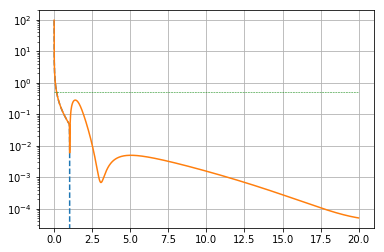

0.06003173244699415


In [10]:
print(len(rnpf[0,:]))
print(len(rnpf))
print(Nu)
print(len(urange))
plt.plot(vrange,drnpvf[0],'--')
plt.plot(vrange,np.abs(drnpvf[0]))
plt.plot([vrange[0],vrange[-1]],[.5,.5],'g--',linewidth=.5)
#plt.plot(vrange,np.abs(drnpvf[1]))
plt.yscale('log')
plt.grid()
plt.show()
print(rnpf[0,0])


In [11]:
switch=0.0
np.save('rnputile',np.array([Nu*Nv,Nu,Nv,ru0,dr0v,M0,Q,Lambda,wHD,switch,vbdytype]))
np.save('urangee',urange)
np.save('vrangee',vrange)

In [12]:
stop = timeit.default_timer()

In [13]:
acttime=stop - start

numpoints=Nu*Nv*uscal

print(0.0,str(acttime)+' seconds')
print(0.0,str((acttime)/60)+' minutes')
print(0.0,str((acttime)/3600)+' hours')

print(str(numpoints)+' points')

print(0.0,str((numpoints)/(stop - start))+' points per second') 

0.0 122.80957913098973 seconds
0.0 2.046826318849829 minutes
0.0 0.03411377198083048 hours
178000000 points
0.0 1449398.3389532156 points per second


conv=False
j=0
tempanswer=[]
    while conv==False:
        dv=TempTolv*dv0
        jcount=1
        while j<Nv-1:
            j1=mth.ceil(jcount*TempTolv)
            j2=mth.floor(jcount*TempTolv)
            answer=dnu.x4giveralt(0,j+mth.ceil((jcount-1)*TempTolv),du,dv*TempTolv,rnpf,phinpf,signpf,massnpf,M0,Q,Lambda,datatype)
            rnpf[1][j+j1]=answer[0]
            phinpf[1][j+j1]=answer[1]
            signpf[1][j+j1]=answer[2]
            massnpf[1][j+j1]=answer[3]
            #drunptemp[j+1]=answer[4]
            dsigunpv=answer[5]
            jcount=(jcount+1)**(0**j2)
            j=j+j2
        
        if np.abs(tempanswer[0]-answer[0])/answer[0]>0.01 or not tempanswer:
            tempanswer=answer
            TempTol=TempTolv/2
            
        else:
            conv=True
            